In [2]:
import json
import numpy as np
import scipy.spatial
import shutil
import os

In [3]:
num_imgs = 32
num_train = 26
num_test = 3

dataset = 'isaac_power_drill'

img_range = np.arange(num_imgs)
np.random.shuffle(img_range)
train_range = img_range[:num_train]
test_range = img_range[num_train:(num_train+num_test)]
val_range = img_range[(num_train+num_test):]

ig = True

print(os.getcwd())

train_data = {}
train_data['near'] = 0.1
train_data['far'] = 2.
train_data['camera_angle_x'] = 0.610865
train_data['camera_angle_y'] = 0.610865
train_data['frames'] = []

for ii in train_range:
    with open(dataset + '/pos_xyz_quat_xyzw_'+str(ii)+'.txt') as file:
        pose = np.fromstring(file.readline()[1:-1], sep=',')

        transform_mat = np.eye(4)
        R = scipy.spatial.transform.Rotation.from_quat(pose[-4:]).as_matrix()
        R = R @ scipy.spatial.transform.Rotation.from_euler('YZ', [-np.pi/2, -np.pi/2]).as_matrix()
        transform_mat[:3, :3] = R
        transform_mat[:3, -1] = pose[:3]

        source_img = 'col_' + str(ii)

        os.makedirs(dataset + '/train', exist_ok=True)

        shutil.copyfile(dataset + '/' + source_img + '.png',
                        dataset + '/train/' + str(ii) + '.png')

        train_data['frames'].append({'transform_matrix': transform_mat.tolist(),
                                     'file_path': 'train/'+str(ii)})

outfile = open(dataset + '/transforms_train.json', 'w')
outfile.write(json.dumps(train_data))
outfile.close()

test_data = train_data
test_data['frames'] = []

for ii in test_range:
    with open(dataset + '/pos_xyz_quat_xyzw_'+str(ii)+'.txt') as file:
        pose = np.fromstring(file.readline()[1:-1], sep=',')

        transform_mat = np.eye(4)
        R = scipy.spatial.transform.Rotation.from_quat(pose[-4:]).as_matrix()
        R = R @ scipy.spatial.transform.Rotation.from_euler('YZ', [-np.pi/2, -np.pi/2]).as_matrix()
        transform_mat[:3, :3] = R
        transform_mat[:3, -1] = pose[:3]

        source_img = 'col_' + str(ii)

        os.makedirs(dataset + '/test', exist_ok=True)

        shutil.copyfile(dataset + '/' + source_img + '.png',
                        dataset + '/test/' + str(ii) + '.png')

        test_data['frames'].append({'transform_matrix': transform_mat.tolist(),
                                     'file_path': 'test/'+str(ii)})

outfile = open(dataset + '/transforms_test.json', 'w')
outfile.write(json.dumps(test_data))
outfile.close()

val_data = test_data
val_data['frames'] = []

for ii in val_range:
    with open(dataset + '/pos_xyz_quat_xyzw_'+str(ii)+'.txt') as file:
        pose = np.fromstring(file.readline()[1:-1], sep=',')

        transform_mat = np.eye(4)
        R = scipy.spatial.transform.Rotation.from_quat(pose[-4:]).as_matrix()
        R = R @ scipy.spatial.transform.Rotation.from_euler('YZ', [-np.pi/2, -np.pi/2]).as_matrix()
        transform_mat[:3, :3] = R
        transform_mat[:3, -1] = pose[:3]

        source_img = 'col_' + str(ii)

        os.makedirs(dataset + '/val', exist_ok=True)

        shutil.copyfile(dataset + '/' + source_img + '.png',
                        dataset + '/val/' + str(ii) + '.png')

        val_data['frames'].append({'transform_matrix': transform_mat.tolist(),
                                     'file_path': 'val/'+str(ii)})

outfile = open(dataset + '/transforms_val.json', 'w')
outfile.write(json.dumps(val_data))
outfile.close()

/scr-ssd/ksrini/nerf_grasping/notebooks-krishnan


In [4]:
ls isaac_power_drill

col_0.png   dep_21.png                pos_xyz_quat_xyzw_3.txt
col_10.png  dep_22.png                pos_xyz_quat_xyzw_4.txt
col_11.png  dep_23.png                pos_xyz_quat_xyzw_5.txt
col_12.png  dep_24.png                pos_xyz_quat_xyzw_6.txt
col_13.png  dep_25.png                pos_xyz_quat_xyzw_7.txt
col_14.png  dep_26.png                pos_xyz_quat_xyzw_8.txt
col_15.png  dep_27.png                pos_xyz_quat_xyzw_9.txt
col_16.png  dep_28.png                seg_0.png
col_17.png  dep_29.png                seg_10.png
col_18.png  dep_2.png                 seg_11.png
col_19.png  dep_30.png                seg_12.png
col_1.png   dep_31.png                seg_13.png
col_20.png  dep_32.png                seg_14.png
col_21.png  dep_3.png                 seg_15.png
col_22.png  dep_4.png                 seg_16.png
col_23.png  dep_5.png                 seg_17.png
col_24.png  dep_6.png                 seg_18.png
col_25.png  dep_7.png                 seg_19.png
col_26.png  dep_8.png       

In [6]:
for ii in train_range:
    with open('poses/fixed_'+str(ii)+'.txt') as file:
        pose = np.fromstring(file.readline()[1:-1], sep=',')

    print(np.linalg.norm(pose[:3]))

FileNotFoundError: [Errno 2] No such file or directory: 'poses/fixed_11.txt'

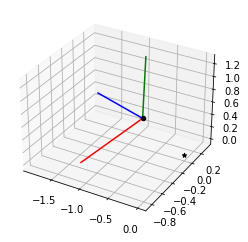

In [40]:
from matplotlib import pyplot as plt

with open('poses/fixed_'+str(ii)+'.txt') as file:
    pose = np.fromstring(file.readline()[1:-1], sep=',')

transform_mat = np.eye(4)
R = scipy.spatial.transform.Rotation.from_quat(pose[-4:]).as_matrix()
R = R @ scipy.spatial.transform.Rotation.from_euler('YZ', [-np.pi/2, -np.pi/2]).as_matrix()
transform_mat[:3, :3] = R
transform_mat[:3, -1] = pose[:3]

# transform_mat = np.linalg.inv(transform_mat)

origin = np.array([0,0,0,1])
e1 = np.array([1, 0, 0, 1])
e2 = np.array([0, 1, 0, 1])
e3 = np.array([0, 0, 1, 1])

ow = transform_mat@origin
w1, w2, w3 = [transform_mat @ ee for ee in (e1, e2, e3)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(ow[0], ow[1], ow[2], c='k')
ax.plot([ow[0], w1[0]], [ow[1], w1[1]], [ow[2], w1[2]], c='r')
ax.plot([ow[0], w2[0]], [ow[1], w2[1]], [ow[2], w2[2]], c='g')
ax.plot([ow[0], w3[0]], [ow[1], w3[1]], [ow[2], w3[2]], c='b')
ax.scatter(0., 0., 0., c='k', marker='*')

'0'